In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotnine import *
import gapminder

In [2]:
players = pd.read_csv('player_stats.csv')

duplicate_columns = ['player', 'club', 'position', 'age', 'team', 'birth_year', 'minutes_90s']
players = players[duplicate_columns]

keeper_columns = ['position','team','age','club','birth_year','games','games_starts','minutes','minutes_90s']

player_defense = pd.read_csv('player_defense.csv').drop(duplicate_columns[2:], axis=1)
player_shooting = pd.read_csv('player_shooting.csv').drop(duplicate_columns[2:], axis=1)
player_possession = pd.read_csv('player_possession.csv').drop(duplicate_columns[2:], axis=1)
player_keepers = pd.read_csv('player_keepers.csv').drop(keeper_columns, axis=1)


# merging all of the above dataframes into one
players = players.merge(player_defense, on='player')
players = players.merge(player_shooting, on='player')
players = players.merge(player_possession, on='player')

#players = players.merge(player_keepers, on='player') -> for some reason everything fucks up with keepers added


players['age'] = players['age'].astype(str).str[:2].astype(int)


players

,player,club,position,age,team,birth_year,minutes_90s,tackles,tackles_won,tackles_def_3rd,...,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,miscontrols,dispossessed,passes_received,progressive_passes_received
0,Aaron Mooy,Celtic,MF,32,Australia,1990,4.0,9.0,6,4.0,...,26.0,0.0,255.0,2.0,3.0,66.7,5.0,4.0,152.0,1.0
1,Aaron Ramsey,Nice,MF,31,Wales,1990,3.0,2.0,0,0.0,...,42.0,5.0,147.0,2.0,8.0,25.0,9.0,4.0,98.0,7.0
2,Abdelhamid Sabiri,Sampdoria,MF,26,Morocco,1996,2.0,3.0,1,1.0,...,13.0,1.0,86.0,0.0,3.0,0.0,0.0,3.0,54.0,0.0
3,Abdelkarim Hassan,Al Sadd SC,DF,29,Qatar,1993,3.0,7.0,3,5.0,...,17.0,2.0,193.0,1.0,5.0,20.0,2.0,0.0,138.0,1.0
4,Abderrazak Hamdallah,Al-Ittihad,FW,32,Morocco,1990,0.8,0.0,0,0.0,...,12.0,5.0,28.0,2.0,3.0,66.7,4.0,3.0,18.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,Ángel Di María,Juventus,MF,34,Argentina,1988,3.2,3.0,1,2.0,...,132.0,17.0,201.0,13.0,25.0,52.0,10.0,6.0,163.0,24.0
676,Ángelo Preciado,Genk,DF,24,Ecuador,1998,2.9,7.0,5,3.0,...,46.0,3.0,162.0,0.0,4.0,0.0,6.0,2.0,81.0,1.0
677,Éder Militão,Real Madrid,DF,24,Brazil,1998,3.9,7.0,6,4.0,...,55.0,6.0,306.0,0.0,0.0,NaN,6.0,1.0,217.0,5.0
678,Óscar Duarte,Al-Wehda,DF,33,Costa Rica,1989,3.0,4.0,2,4.0,...,4.0,1.0,132.0,0.0,0.0,NaN,1.0,0.0,70.0,0.0


In [3]:
players

,player,club,position,age,team,birth_year,minutes_90s,tackles,tackles_won,tackles_def_3rd,...,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,miscontrols,dispossessed,passes_received,progressive_passes_received
0,Aaron Mooy,Celtic,MF,32,Australia,1990,4.0,9.0,6,4.0,...,26.0,0.0,255.0,2.0,3.0,66.7,5.0,4.0,152.0,1.0
1,Aaron Ramsey,Nice,MF,31,Wales,1990,3.0,2.0,0,0.0,...,42.0,5.0,147.0,2.0,8.0,25.0,9.0,4.0,98.0,7.0
2,Abdelhamid Sabiri,Sampdoria,MF,26,Morocco,1996,2.0,3.0,1,1.0,...,13.0,1.0,86.0,0.0,3.0,0.0,0.0,3.0,54.0,0.0
3,Abdelkarim Hassan,Al Sadd SC,DF,29,Qatar,1993,3.0,7.0,3,5.0,...,17.0,2.0,193.0,1.0,5.0,20.0,2.0,0.0,138.0,1.0
4,Abderrazak Hamdallah,Al-Ittihad,FW,32,Morocco,1990,0.8,0.0,0,0.0,...,12.0,5.0,28.0,2.0,3.0,66.7,4.0,3.0,18.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,Ángel Di María,Juventus,MF,34,Argentina,1988,3.2,3.0,1,2.0,...,132.0,17.0,201.0,13.0,25.0,52.0,10.0,6.0,163.0,24.0
676,Ángelo Preciado,Genk,DF,24,Ecuador,1998,2.9,7.0,5,3.0,...,46.0,3.0,162.0,0.0,4.0,0.0,6.0,2.0,81.0,1.0
677,Éder Militão,Real Madrid,DF,24,Brazil,1998,3.9,7.0,6,4.0,...,55.0,6.0,306.0,0.0,0.0,NaN,6.0,1.0,217.0,5.0
678,Óscar Duarte,Al-Wehda,DF,33,Costa Rica,1989,3.0,4.0,2,4.0,...,4.0,1.0,132.0,0.0,0.0,NaN,1.0,0.0,70.0,0.0


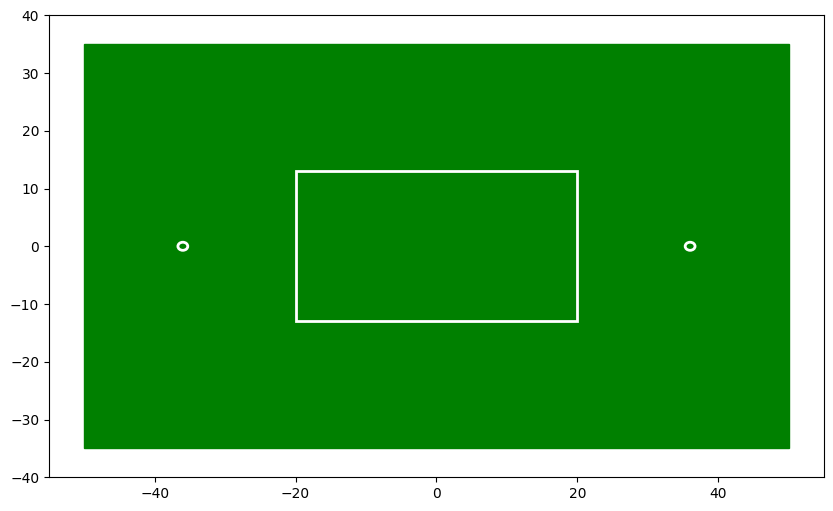

In [1]:
from mplsoccer import Pitch